In [ ]:
!pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 2.2 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 5.3 MB/s 
     |████████████████████████████████| 9.8 MB 37.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
!pip install statsmodels==0.12.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.5 MB 5.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.13.2
    Uninstalling statsmodels-0.13.2:
      Successfully uninstalled statsmodels-0.13.2


In [ ]:
import pandas as pd 
import pandas_datareader as web 
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from statsmodels.tsa.stattools import adfuller
import numpy as np

from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error

# 1. Exploring the monstera data all types together (3.5, 5.5, 7.6 inches)

This is same model as in exploration of other flowers

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 2017_2022_monthly_monstera.xlsx to 2017_2022_monthly_monstera.xlsx


In [ ]:
read_file = pd.read_excel('2017_2022_monthly_monstera.xlsx')

In [ ]:
read_file.to_csv ('2017_2022_monthly_monstera.xlsx', index = None, header=True)

In [ ]:
df = pd.read_csv('2017_2022_monthly_monstera.xlsx')
df.head()

,date,all,averagesum
0,2017-08,12,8000
1,2017-08,240,3083
2,2017-09,45,8833
3,2017-09,30,10000
4,2017-09,220,2915


In [ ]:
df['date'] = pd.to_datetime(df['date'], errors = 'coerce')
df.set_index('date', inplace=True)
ts = df['all']
ts

date
2017-08-01      12
2017-08-01     240
2017-09-01      45
2017-09-01      30
2017-09-01     220
2017-10-01     140
2017-10-01      70
2017-10-01      42
2017-10-01    1300
2017-11-01     125
2017-11-01     402
2017-11-01     120
2017-11-01     560
2017-12-01      15
2017-12-01      90
2017-12-01      60
2018-01-01     414
2018-01-01     640
2018-02-01     255
2018-02-01      30
2018-03-01     132
2018-03-01     240
2018-03-01      45
2018-04-01      60
2018-04-01     198
2018-04-01    1584
2018-05-01     140
2018-05-01     360
2018-06-01      45
2018-06-01     108
2018-06-01     864
2018-07-01      48
2018-07-01      48
2018-07-01    1434
2018-08-01      77
2018-08-01      40
2018-08-01      96
2018-08-01     660
2018-08-01      36
2018-08-01     320
2018-09-01     150
2018-09-01     258
2018-09-01     200
2018-10-01     105
2018-10-01      60
2018-10-01    1014
2018-11-01      44
2018-11-01      15
2018-11-01     906
2018-12-01    1133
2019-01-01      80
2019-01-01      40
2019-01

In [ ]:
ts_a = df['averagesum']
ts_a

date
2017-08-01     8000
2017-08-01     3083
2017-09-01     8833
2017-09-01    10000
2017-09-01     2915
2017-10-01    10063
2017-10-01    21371
2017-10-01     4503
2017-10-01     2519
2017-11-01     9856
2017-11-01    22508
2017-11-01     7033
2017-11-01     2412
2017-12-01     9000
2017-12-01    18000
2017-12-01     2012
2018-01-01     7213
2018-01-01     2004
2018-02-01     7621
2018-02-01     5701
2018-03-01     7500
2018-03-01     2313
2018-03-01     2200
2018-04-01    14350
2018-04-01     8409
2018-04-01     2474
2018-05-01    11904
2018-05-01     2486
2018-06-01     9142
2018-06-01    12163
2018-06-01     6304
2018-07-01    11165
2018-07-01    12000
2018-07-01     5585
2018-08-01     8701
2018-08-01    12057
2018-08-01     4001
2018-08-01     4790
2018-08-01     2002
2018-08-01     2000
2018-09-01     5901
2018-09-01     4155
2018-09-01     1962
2018-10-01     8890
2018-10-01     4000
2018-10-01     4716
2018-11-01     9091
2018-11-01    10000
2018-11-01     5006
2018-12-01     

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 275 entries, 2017-08-01 to 2022-05-01
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   all         275 non-null    int64
 1   averagesum  275 non-null    int64
dtypes: int64(2)
memory usage: 6.4 KB
None


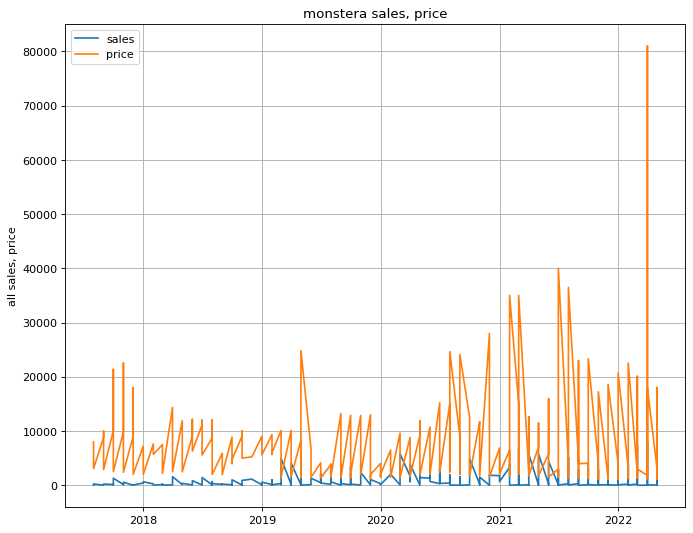

In [ ]:
plt.figure(figsize=(10, 8), dpi=80)
plt.plot(ts, label='sales')
plt.plot(ts_a, label='price')
plt.title('monstera sales, price')
plt.ylabel('all sales, price')
plt.legend()
plt.grid()
plt.show()

date
2022-01-01      30
2022-01-01     260
2022-01-01      76
2022-01-01    3260
2022-01-01    3468
2022-01-01     100
2022-02-01     216
2022-02-01      45
2022-02-01     120
2022-02-01      60
2022-02-01     900
2022-02-01    3696
2022-02-01      17
2022-02-01    3240
2022-02-01      40
2022-03-01     234
2022-03-01     300
2022-03-01      10
2022-03-01     165
2022-03-01     660
2022-03-01     200
2022-03-01     131
2022-03-01    7056
2022-03-01    7120
2022-03-01     105
2022-03-01      10
2022-04-01      12
2022-04-01      50
2022-04-01      50
2022-04-01     416
2022-04-01      12
2022-04-01     302
2022-04-01    5802
2022-04-01     588
2022-04-01    8080
2022-04-01      80
2022-05-01      48
2022-05-01      10
2022-05-01     600
2022-05-01     140
2022-05-01      29
2022-05-01     233
2022-05-01      54
2022-05-01    4938
2022-05-01     216
2022-05-01    7320
2022-05-01       8
Name: all, dtype: int64


Text(0.5, 1.0, 'Train/Test split for data')

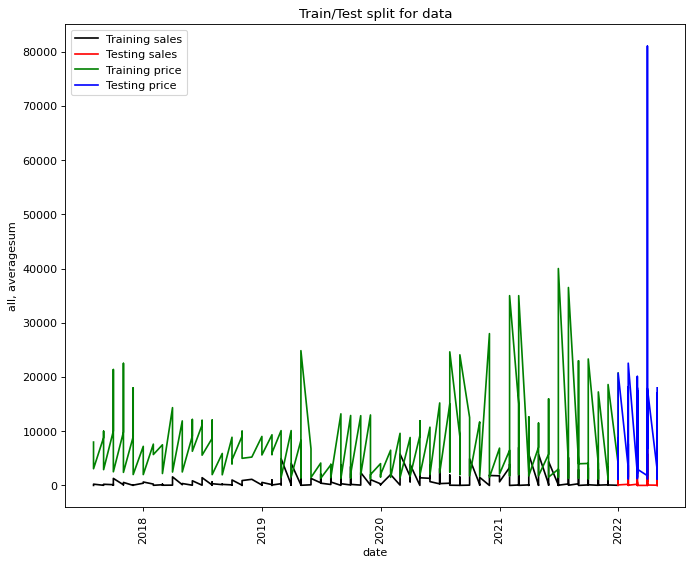

In [ ]:
train = ts[:'2022-01-01']
test = ts['2022-01-01':]
train_a = ts_a[:'2022-01-01']
test_a = ts_a['2022-01-01':]
print(test)
plt.figure(figsize=(10, 8), dpi=80)
plt.plot(train, color = "black", label = 'Training sales')
plt.plot(test, color = "red", label = 'Testing sales')
plt.plot(train_a, color = "green", label = 'Training price')
plt.plot(test_a, color = "blue", label = 'Testing price')
plt.ylabel('all, averagesum')
plt.xlabel('date')
plt.legend()
plt.xticks(rotation=90)
plt.title("Train/Test split for data")

In [ ]:
def check_stationarity(ts):
    dftest = adfuller(ts)
    adf = dftest[0]
    pvalue = dftest[1]
    critical_value = dftest[4]['5%']
    if (pvalue < 0.05) and (adf < critical_value):
        print('The time series are stationary')
    else:
        print('The time series are NOT stationary')

In [ ]:
check_stationarity(train)

The time series are NOT stationary


In [ ]:
check_stationarity(train_a)

The time series are stationary


In [ ]:
ts_diff = train.diff()
ts_diff.dropna(inplace=True)
check_stationarity(ts_diff)

The time series are stationary


plotting the difefrenced data only for train sales set, so as train_a price in stationary data

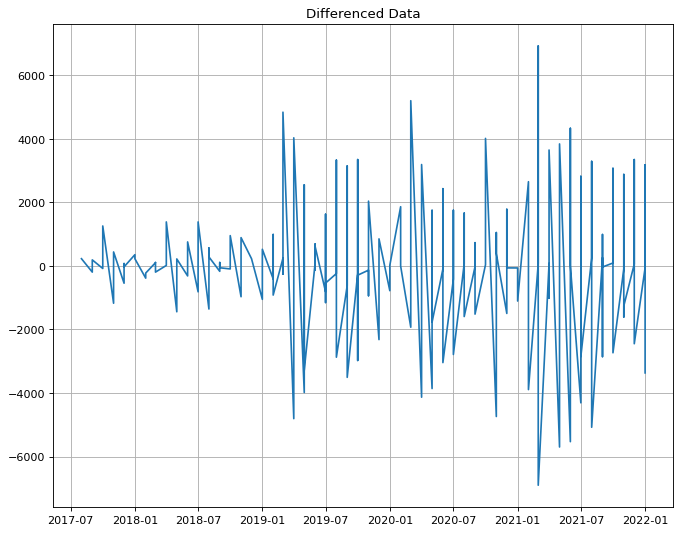

In [ ]:
plt.figure(figsize=(10, 8), dpi=80)
plt.plot(ts_diff)
plt.title('Differenced Data')
plt.grid()
plt.show()

automatically setted parameters with multi-step forcasting model

for sales:

In [ ]:
import pmdarima as pm
stepwise_model = pm.auto_arima(train,start_p=1, d=1, start_q=1,
                            max_p=12, max_q=12,
                            m=12,
                            seasonal=True, stationary=False,
                            information_criterion='aic',
                            stepwise=False,
                            suppress_warnings=True)
stepwise_model.fit(train)

ARIMA(order=(0, 1, 3), scoring_args={}, seasonal_order=(2, 0, 0, 12),
      suppress_warnings=True)

for price:

In [ ]:
stepwise_model_a = pm.auto_arima(train_a,start_p=1, d=0, start_q=1,
                            max_p=12, max_q=12,
                            m=12,
                            seasonal=True, stationary=False,
                            information_criterion='aic',
                            stepwise=False,
                            suppress_warnings=True)
stepwise_model_a.fit(train_a)

ARIMA(order=(5, 0, 0), scoring_args={}, seasonal_order=(0, 0, 0, 12),
      suppress_warnings=True)

In [ ]:
n_test = test.shape[0] #sales

In [ ]:
n_test_a = test_a.shape[0] #price

In [ ]:
ts_pred_auto = stepwise_model.predict(n_periods=n_test) #sales

In [ ]:
ts_pred_auto_a = stepwise_model_a.predict(n_periods=n_test_a) #price

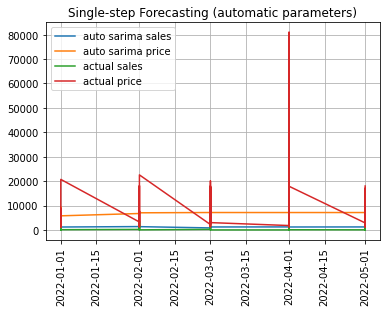

In [ ]:
plt.plot(test.index,ts_pred_auto, label='auto sarima sales') #auto sarima sales and price is the same line so the orange line hides the blue one
plt.plot(test_a.index,ts_pred_auto_a, label='auto sarima price')
plt.plot(test, label='actual sales')
plt.plot(test_a, label='actual price')
plt.title('Single-step Forecasting (automatic parameters)')
plt.grid()
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [ ]:
nrmse = rmse(ts_pred_auto, test)/(np.max(test)-np.min(test)) #sales
nrmse

0.28483271299690627

In [ ]:
nrmse_a = rmse(ts_pred_auto_a, test_a)/(np.max(test_a)-np.min(test_a)) #price - very accurate prediction with a one step difference
nrmse_a

0.15860196536619156

# 3. exploration of the data of 5.5 monstera

In [ ]:
uploaded = files.upload()

Saving 05_5inch_monstera_2022.csv to 05_5inch_monstera_2022.csv


In [ ]:
df_2 = pd.read_csv('05_5inch_monstera_2022.csv')
df_2.fillna(0, inplace = True)
df_2.head()

,date,all,average
0,2017-08,0.0,0.0
1,2017-09,30.0,10000.0
2,2017-10,42.0,4503.0
3,2017-11,120.0,7033.0
4,2017-12,0.0,0.0


In [ ]:
df_2['date'] = pd.to_datetime(df_2['date'], errors = 'coerce')
df_2.set_index('date', inplace=True)
ts_2 = df_2['all']
ts_2

date
2017-08-01       0.0
2017-09-01      30.0
2017-10-01      42.0
2017-11-01     120.0
2017-12-01       0.0
2018-01-01       0.0
2018-02-01      30.0
2018-03-01       0.0
2018-04-01       0.0
2018-05-01       0.0
2018-06-01     864.0
2018-07-01    1434.0
2018-08-01     660.0
2018-09-01     258.0
2018-10-01    1014.0
2018-11-01     906.0
2018-12-01    1133.0
2019-01-01     564.0
2019-02-01      84.0
2019-03-01     240.0
2019-04-01     774.0
2019-05-01     840.0
2019-06-01     810.0
2019-07-01    2112.0
2019-08-01    3510.0
2019-09-01    3832.0
2019-10-01    3468.0
2019-11-01    1277.0
2019-12-01     630.0
2020-01-01     300.0
2020-02-01       0.0
2020-03-01     600.0
2020-04-01     684.0
2020-05-01    3186.0
2020-06-01    3752.0
2020-07-01    3132.0
2020-08-01    1908.0
2020-09-01     822.0
2020-10-01     906.0
2020-11-01    1110.0
2020-12-01    1902.0
2021-01-01    1776.0
2021-02-01    3322.0
2021-03-01    7008.0
2021-04-01    2112.0
2021-05-01    1920.0
2021-06-01    4392.0
2021-07-

In [ ]:
ts_2_a = df_2['average']
ts_2_a

date
2017-08-01        0.0
2017-09-01    10000.0
2017-10-01     4503.0
2017-11-01     7033.0
2017-12-01        0.0
2018-01-01        0.0
2018-02-01     5701.0
2018-03-01        0.0
2018-04-01        0.0
2018-05-01        0.0
2018-06-01     6304.0
2018-07-01     5585.0
2018-08-01     4790.0
2018-09-01     4155.0
2018-10-01     4716.0
2018-11-01     5006.0
2018-12-01     5234.0
2019-01-01     5623.0
2019-02-01     6009.0
2019-03-01     5155.0
2019-04-01     4532.0
2019-05-01     4337.0
2019-06-01     4331.0
2019-07-01     4076.0
2019-08-01     3885.0
2019-09-01     3739.0
2019-10-01     3864.0
2019-11-01     3945.0
2019-12-01     3892.0
2020-01-01     4028.0
2020-02-01        0.0
2020-03-01     4635.0
2020-04-01     4772.0
2020-05-01     4558.0
2020-06-01     4572.0
2020-07-01     4743.0
2020-08-01     4672.0
2020-09-01     4743.0
2020-10-01     6617.0
2020-11-01     7869.0
2020-12-01     7922.0
2021-01-01     6886.0
2021-02-01     6488.0
2021-03-01     5293.0
2021-04-01     5319.0
2021-

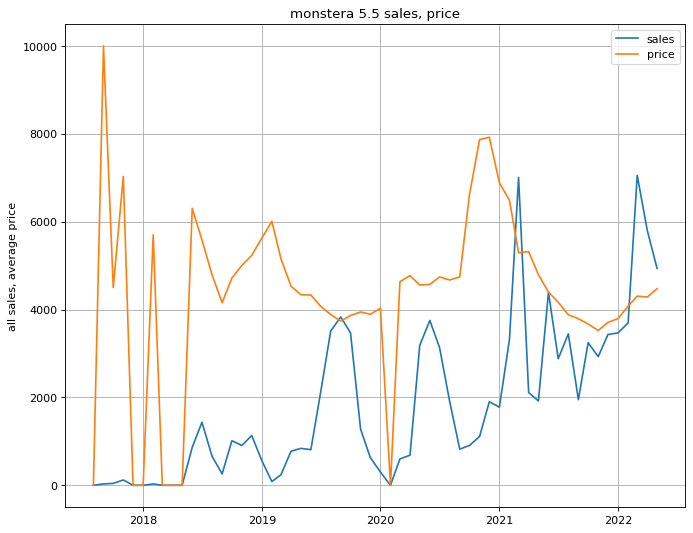

In [ ]:
plt.figure(figsize=(10, 8), dpi=80)
plt.plot(ts_2, label='sales')
plt.plot(ts_2_a, label='price') #price orange
plt.title('monstera 5.5 sales, price')
plt.ylabel('all sales, average price')
plt.legend()
plt.grid()
plt.show()

date
2022-01-01    3468.0
2022-02-01    3696.0
2022-03-01    7056.0
2022-04-01    5802.0
2022-05-01    4938.0
Name: all, dtype: float64
date
2022-01-01    3794.0
2022-02-01    4076.0
2022-03-01    4306.0
2022-04-01    4286.0
2022-05-01    4474.0
Name: average, dtype: float64


Text(0.5, 1.0, 'Train/Test split for data')

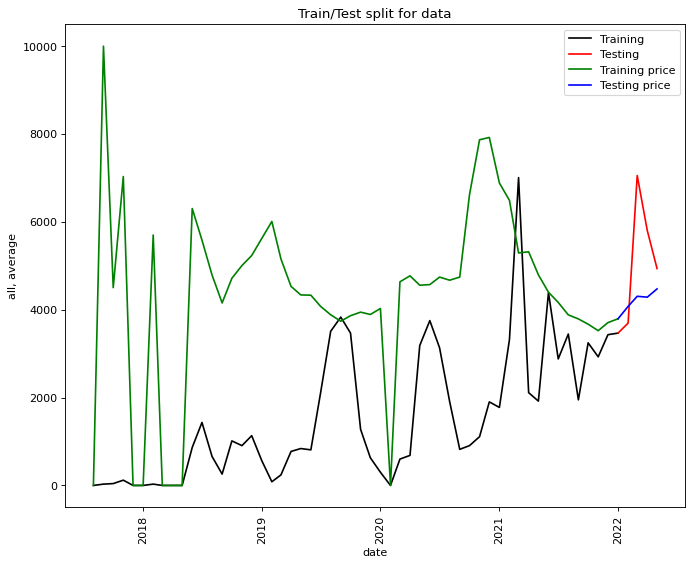

In [ ]:
train_2 = ts_2[:'2022-01-01']
test_2 = ts_2['2022-01-01':]
train_2_a = ts_2_a[:'2022-01-01']
test_2_a = ts_2_a['2022-01-01':]
print(test_2)
print(test_2_a)
plt.figure(figsize=(10, 8), dpi=80)
plt.plot(train_2, color = "black", label = 'Training')
plt.plot(test_2, color = "red", label = 'Testing')
plt.plot(train_2_a, color = "green", label = 'Training price')
plt.plot(test_2_a, color = "blue", label = 'Testing price')
plt.ylabel('all, average')
plt.xlabel('date')
plt.xticks(rotation=90)
plt.legend()
plt.title("Train/Test split for data")

In [ ]:
check_stationarity(train_2) #sales

The time series are NOT stationary


In [ ]:
check_stationarity(train_2_a) #price

The time series are stationary


In [ ]:
ts_diff_2 = train_2.diff()
ts_diff_2.dropna(inplace=True)
check_stationarity(ts_diff_2)

The time series are stationary


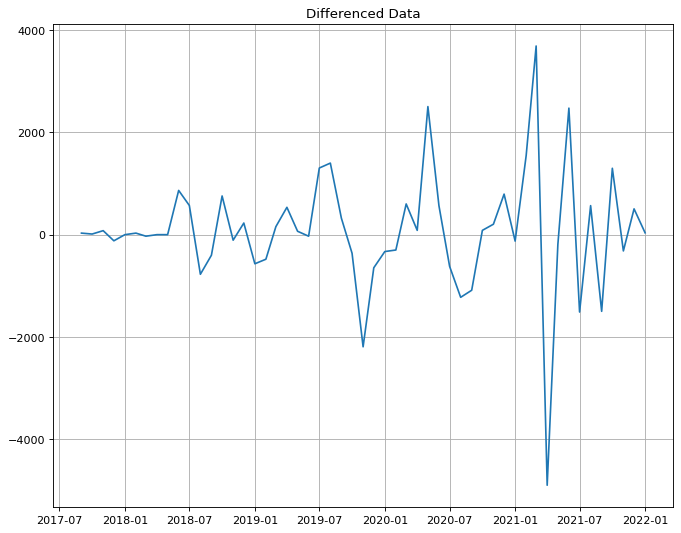

In [ ]:
plt.figure(figsize=(10, 8), dpi=80) #for sales only
plt.plot(ts_diff_2)
plt.title('Differenced Data')
plt.grid()
plt.show()

In [ ]:
stepwise_model_2 = pm.auto_arima(train_2,start_p=1, d=1, start_q=1,
                            max_p=12, max_q=12,
                            m=12,
                            seasonal=True, stationary=False,
                            information_criterion='aic',
                            stepwise=False,
                            suppress_warnings=True)
stepwise_model_2.fit(train_2)

ARIMA(order=(1, 1, 3), scoring_args={}, seasonal_order=(1, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [ ]:
stepwise_model_2_a = pm.auto_arima(train_2_a,start_p=1, d=0, start_q=1,
                            max_p=12, max_q=12,
                            m=12,
                            seasonal=True, stationary=False,
                            information_criterion='aic',
                            stepwise=False,
                            suppress_warnings=True)
stepwise_model_2_a.fit(train_2_a)

ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(0, 0, 1, 12),
      suppress_warnings=True)

In [ ]:
n_test_2 = test_2.shape[0]

In [ ]:
n_test_2_a = test_2_a.shape[0]

In [ ]:
ts_pred_auto_2 = stepwise_model_2.predict(n_periods=n_test_2)

In [ ]:
ts_pred_auto_2_a = stepwise_model_2_a.predict(n_periods=n_test_2_a)

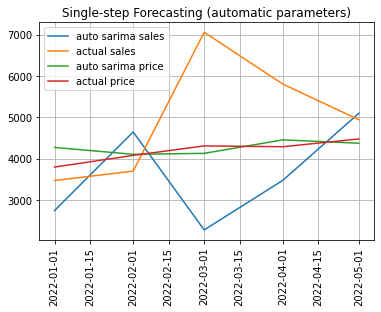

In [ ]:
plt.plot(test_2.index,ts_pred_auto_2, label='auto sarima sales')
plt.plot(test_2, label='actual sales')
plt.plot(test_2_a.index,ts_pred_auto_2_a, label='auto sarima price')
plt.plot(test_2_a, label='actual price')
plt.title('Single-step Forecasting (automatic parameters)')
plt.grid()
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [ ]:
nrmse_2 = rmse(ts_pred_auto_2, test_2)/(np.max(test_2)-np.min(test_2))
nrmse_2

0.67984056544162

In [ ]:
nrmse_2_a = rmse(ts_pred_auto_2_a, test_2_a)/(np.max(test_2_a)-np.min(test_2_a)) 
nrmse_2_a

0.35848496656484374

# 5. Conclusion:
***Monstera data has a lot of empty dates with no sales that makes prediction harder to make and mean squared error is higher than other flowers' data. But even though, we can figure out a general trend of sales prediction and assume which way the sales go. *** 
In general, price of Monstera plant shows better prediction than amount of sales. Error shows always smaller results than error in sales. Price takes better time-series prediction than sales.